## Reading 37-3 - Thread Scheduling - Round Robin and MLFQ

## Round Robin

Instead of running jobs to completion, what if we use a timer <b>interrupt</b> to rotate through processes.

<b>Round Robin</b> - Each process is executed for a certain time slice before another process is selected.
<ul>
    <li>Advantage: a <b>fair</b> policy since it evenly divides the the CPU among active processes.</li>
    <li>Disadvantage: Some jobs, like printing, need to be completed in one run</li>
</ul>

> Average turnaround time is longer, but fairer. Shorter response time.

### Example

Jobs A, B, and C arrive at time 0.
Job A runs for 30 seconds
Job B runs for 15 seconds
Job C runs for 20 seconds

Using the Round-Robin Algorithm where each process is interrupted every 5 seconds, describe the round-robin operation and state the turnaround and response times.

Solution:

    Job A runs from 0-5 - 25 seconds left
    Job B runs from 5-10 - 10 seconds left
    Job C runs from 10-15 - 15 seconds left
    Job A runs from 15-20 - 20 seconds left
    Job B runs from 20-25 - 5 seconds left
    Job C runs from 25-30 - 10 seconds left
    Job A runs from 30-35 - 15 seconds left
    Job B runs from 35-40 - 0 seconds left. Complete!
    Job C runs from 40-45 - 5 seconds left
    Job A runs from 45-50 - 10 seconds left
    Job C runs from 50-55 - 0 seconds left. Complete!
    Job A runs from 55-65 - 0 seconds left. Complete!
    
    The average <b>turnaround</b> time is:

        (65 + 55 + 40) / 3 = 53.333s / job

    The average <b>response</b> time is:

        (0 + 5 + 10) / 3 = 5s / job

## Multi-Level Feedback Queue

A Multi-Level Feedback Queue (MLFQ) tries to optimize both turnaround time and response time.
<ul>
    <li>Like FIFO, it tries to complete shortest jobs first</li>
    <li>Like Round Robin, it tries to be fair</li>
    <li>Unlike either, it will factor incorporate I/O and will adjust priority levels over time</li>
</ul>

To accomplish this, MLFQ uses multiple queues, where each queue represents a particular priority level.
<ul>
    <li>We select jobs from the highest priority levels first</li>
    <li>Within a level, we use Round Robin</li>
</ul>

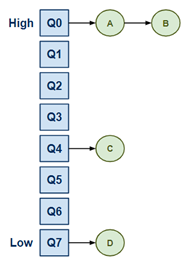

To manage the various priority levels, we use the following rules:
<ol>
    <li>If Priority(A) > Priority(B), A runs</li>
    <li>If Priority(A) == Priority(B), A & B run in RR with the shortest jobs first</li>
    <li>A job is initially placed in the highest priority level</li>
    <li>Once a job uses up its time allotment at a given level, its priority is reduced (ie. it is moves down one queue)</li>
    <li>After some time period S, move all jobs in the system to the topmost queue.</li>
</ol>

### MLFQ Example

Jobs A, B, C, D, and E arrive at time 0.
Job A runs for 45 seconds with a priority of 4
Job B runs for 15 seconds with a priority of 2
Job C runs for 20 seconds with a priority of 3
Job D runs for 25 seconds with a priority of 2
Job E runs for 30 seconds with a priority of 3

Using the MLFQ Algorithm where each process is interrupted every 10 seconds in each priority level, and each level has a time allotment of 20 seconds describe the MLFQ operation and state the turnaround and response times.

Solution:

    Priority 4: Job A has 45s
        Job A runs for 20s from 0-20s. 0 allotment left. 25 total left. Moves down to priority 3.
        
    Priority 3: Job C has 20s. Job A has 25s. Job E has 30s.
        Job C runs for 10s from 20-30s. 10 allotment left. 10 total left.
        Job A runs for 10s from 30-40s. 10 allotment left. 15 total left.
        Job E runs for 10s from 40-50s. 10 allotment left. 20 total left.
        Job C runs for 10s from 50-60s. Completed!
        Job A runs for 10s from 60-70s. 0 allotment left. 5 total left. Moves down to priority 2.
        Job E runs for 10s from 70-80s. 0 allotment left. 10 total left. Moves down to priority 2.
        
    Priority 2: Job A has 5s, Job E has 10 left. Job B has 15 left. Job D has 25 left.
        Job A runs for 5s from 80-85s. Completed!
        Job E runs for 10s from 85-95s. Completed!
        Job B runs for 10s from 95-105s. 10 allotment left. 5 total left.
        Job D runs for 10s from 105-115s. 10 allotment left. 15 total left.
        Job B runs for 10s from 115-120s. Completed!
        Job D runs for 10s from 120-130s. 0 allotment left. 5 total left.
        
    Priority 1: Job D has 5x
        Job D runs for 5s from 130-135s. Completed!
        
    The average <b>turnaround</b> time is:

        (85 + 120 + 60 + 135 + 95) / 5 = 99s / job

    The average <b>response</b> time is:

        (0 + 95 + 20 + 105 + 40) / 5 = 52s / job

### <font color = "red">Class Introduction Question #6 - What is the Round Robin Scheduling Algorithm?</font>

### <font color = "red">Class Introduction Question #7 - What is the MLFQ Scheduling Algorithm?</font>